In [138]:
import numpy as np
from math import sin
import matplotlib.pyplot as plt

In [144]:
function = 'x**2*sin(x)'
n = 25
a = -10
b = 10

In [145]:
F = np.zeros(n, dtype=np.float64)
X = np.linspace(a, b, num = n)
for idx, x in np.ndenumerate(X):
    F[idx] = eval(function)

In [146]:
def LagrangeInterpolation(point, X, Y):
    xp = point
    yp = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (xp - X[j])/(X[i] - X[j])
        yp = yp + p * Y[i]
        
    return yp

In [147]:
newX = np.linspace(a, b, num = n * 10)
iF = np.zeros(n * 10, dtype=np.float64)
serror = 0
for idx, x in np.ndenumerate(iF):
    iF[idx] = LagrangeInterpolation(newX[idx], X, F)
    serror = abs((iF[idx]-eval(function))/iF[idx])
avgerr = serror / (n * 10)
print('ошибочка:', avgerr)

ошибочка: 0.004


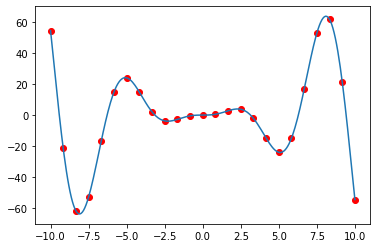

In [148]:
plt.plot(X, F, 'ro')
plt.plot(newX, iF)
plt.show()